
# Optimización cuadratica


## Resumencito

Sea f cuadratico, entonces

1. f es convexa
2. $x^* = \underset{*}{argmin}f(x) - \text{minimizador global}$
3. Taylor expasion en segundo orden. Siendo $x_k$ un punto de expasión 
    
    donde:
    
    $$
    f_k = f(x_k) \\ \nabla f_k = \nabla f(x_k)\\ \nabla^2f_k = \nabla^2f_k (x_k) \\ \delta x_k = x - x_k
    $$
4. La forma cerrada para calcular el minimizdor 
    
    $$
    x^* = x_k - [\nabla^2f_k]^{-1}\nabla fk
    $$

5. Ajustando un modelo lineal 

    $$
    \mathcal{J}(\alpha) = \cfrac{1}{2}||y - x\alpha || ^2 \\
    \text{El problema de optimización resuelve} \\
    \alpha ^* = \underset{\alpha}{argmin}\ \mathcal{J}(\alpha)
    $$
    
basados en (4)

$$
\alpha^* = \alpha_k - [\nabla^2\mathcal{J}_k]^{-1}\nabla \mathcal{J}_k = [x^Tx]^{-1}x^Ty   
$$

f es cuadratica 

$$
f(x) = q(x)
$$

Si $f(X)$ es altamente no lineal 

$$
f(x) \approx q(x)
$$

In [95]:
import numpy as np 
import sympy as sp
import matplotlib.pyplot as ptl

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

## Función lineal

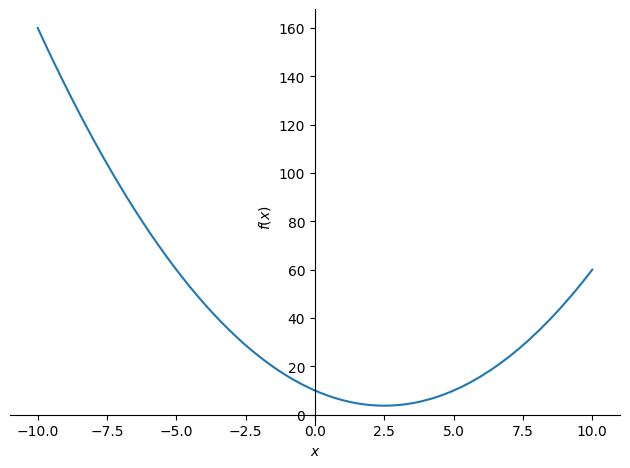

In [53]:
f = sp.parse_expr("x**2 - 5*x + 10")
sp.plot(f)

In [54]:
sp.solve(sp.diff(f))

[5/2]

In [55]:
sp.diff(sp.diff(f)) # confirmar que es  un minimo

2

In [56]:
q = sp.series(f, x0=0)
q # es igual a la serie original

x**2 - 5*x + 10

## Función altamente NO 

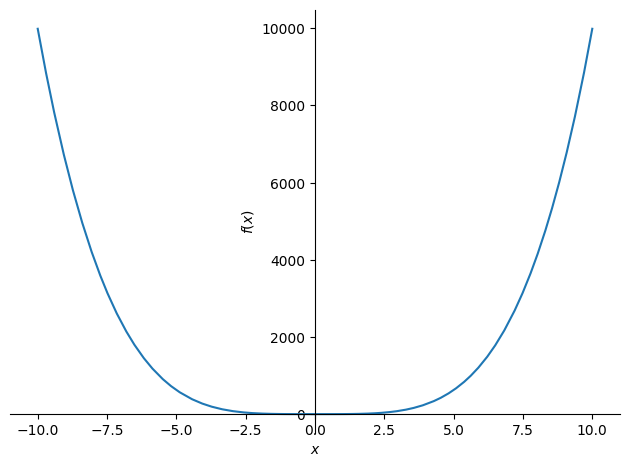

In [57]:
f = sp.parse_expr("x**4 - 10")
sp.plot(f)

In [58]:
q = sp.series(f, x0=2, n=3).removeO()
q

# a diferencia del caso anterior, no es igual porque no es lineal

32*x + 24*(x - 2)**2 - 58

In [59]:
sp.solve(sp.diff(q))

[4/3]

In [60]:
sp.solve(sp.diff(f))

[0]

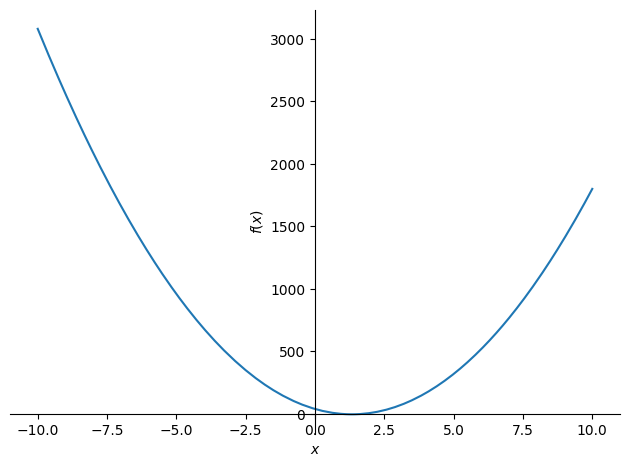

In [61]:
sp.plot(q)

Si f es altamente no lineal, hay que resolver un sistema de ecuaciones no lineal


$$
    f_k = f(x_k) \\ \nabla f_k = \nabla f(x_k)\\ \nabla^2f_k = \nabla^2f_k (x_k) \\ \delta x_k = x - x_k
$$
    

### Ejemplo: DIXON-PRICE FUNCTION

$$
f(x) = (x_1 - 1) 2 + \sum ^d _{i = 2}i(2x^2_i - x_{i - 1})^2 \\
2(−𝑥_1+2𝑥^2_2)^2+(𝑥_1−1)^2
$$

In [63]:
f = sp.parse_expr("(x1 - 1)**2 + 2*(2*x2**2-x1)**2")
f

2*(-x1 + 2*x2**2)**2 + (x1 - 1)**2

In [74]:
x = list(f.free_symbols)
x.sort(key=str)
x = sp.Matrix(x).T
x

Matrix([[x1, x2]])

In [97]:
# Condiciones de primer orden
x_critico = sp.solve(sp.Matrix([f]).jacobian(x))
x_critico

[{x1: 1/3, x2: 0}, {x1: 1, x2: -sqrt(2)/2}, {x1: 1, x2: sqrt(2)/2}]

In [110]:
# Condiciones de seguindo orden

print("hesiana")
hessian = sp.Matrix([[f.diff(xi).diff(xj) for xi in x] for xj in x])
hessian

hesiana


Matrix([
[     6,            -16*x2],
[-16*x2, -16*x1 + 96*x2**2]])

In [115]:
for xi in x_critico:
    hessiana_xcritico = hessian.subs(xi)
    print(list(xi.values()), hessiana_xcritico.is_positive_definite)
    hessiana_xcritico

[1/3, 0] False


Matrix([
[6,     0],
[0, -16/3]])

[1, -sqrt(2)/2] True


Matrix([
[        6, 8*sqrt(2)],
[8*sqrt(2),        32]])

[1, sqrt(2)/2] True


Matrix([
[         6, -8*sqrt(2)],
[-8*sqrt(2),         32]])

In [112]:
gradient = sp.Matrix([f.diff(xi) for xi in x])
gradient 

Matrix([
[   6*x1 - 8*x2**2 - 2],
[16*x2*(-x1 + 2*x2**2)]])

In [119]:
gradient.subs({x[0]: 2, x[1]: 2})
hessian.subs({x[0]: 2, x[1]: 2})

Matrix([
[-22],
[192]])

Matrix([
[  6, -32],
[-32, 352]])

In [155]:
from sympy.solvers.solveset import linsolve

xk = np.array([2, 2])

gradient_k_list = []
xk_list = []


for k in range(10): # por la cuadratura va mas rapido, no necesita paso, el paso es automatico
    gradient_k = gradient.subs(list(zip(x, xk))).evalf()
    hessian_k = hessian.subs(list(zip(x, xk))).evalf()
    
    # guardar el caminito que va recorriendo
    xk_list.append(x_k)
    gradient_k_list.append(gradient_k)
    
    dk = linsolve(hessian_k -gradient_k, x)
    xk = (x_k + dk)[0]
    xk

ShapeError: Matrix size mismatch: (2, 2) + (2, 1)